In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\jllce\Downloads\train.csv')

In [3]:
# Aqui eu posso ver quais variaveis explicam melhor a SalePrice, e posso usar isso pra selecionar as variáveis que eu vou
# querer usar no meu modelo
correlation = df.corr()
correlation["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [4]:
# aqui eu pego a correlação que criei acima e seleciono as 10 variaveis que melhor explicam a SalePrice
n = 10
cols = correlation.nlargest(n, "SalePrice")["SalePrice"].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [5]:
# Criei um array com as correlações de cada item da "cols" em relação aos demais itens da "cols"
cm = np.corrcoef(df[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

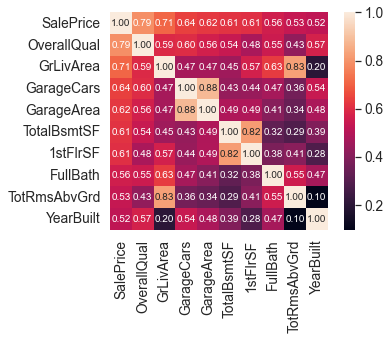

In [6]:
# Heatmap para mostrar em gráfico o que vimos. As duas melhores sao a OverallQual e GrLivArea
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={"size":10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

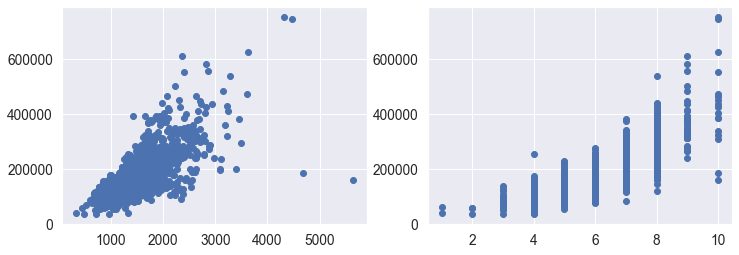

In [7]:
# Essa plotagem mostra como é difícil comparar essas duas variaveis do "x" em relação ao "y".

x = df[["GrLivArea","OverallQual"]].values    #lembrando que essas são as variáveis independentes
y = df["SalePrice"].values                    #e essa é a dependente

fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)

plt.show

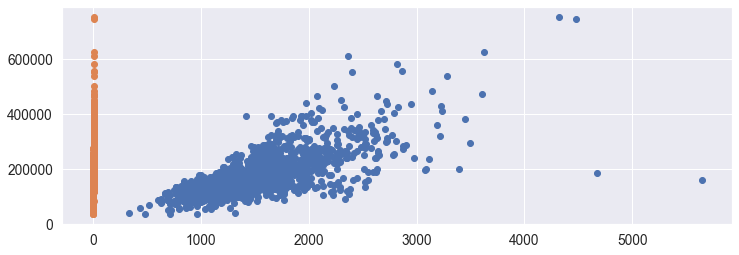

In [8]:
# Esse grafico abaixo mostra essas duas variaveis do "x" juntas no mesmo gráfico em relação ao "y".
# Não é possível compará-las sem que haja uma normalização/padronização
fig, ax = plt.subplots(figsize = (12,4))
ax.scatter(x[:,0],y)
ax.scatter(x[:,1],y)

plt.show()

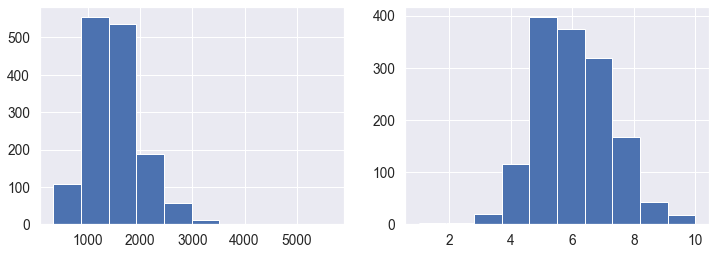

In [9]:
# O histograma melhora a distribuição em relação àquela espalhada. Mas vamos ter que tratar essas variaveis 
# para poder fazer comparação numa escala igual pra todas.
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].hist(x[:,0])
ax[1].hist(x[:,1])
plt.show()

In [10]:
# Então, agora vai ser aplicada a padronização/normalização das variaveis, para conseguirmos utilizá-las juntas nos modelos
# Importando mais alguns pacotes
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
# primeiramente, padronizando a variável X (lembrando que os valores estarão em unidades de desvio padrão)
x_std = StandardScaler().fit_transform(x)
x_std

array([[ 0.37033344,  0.65147924],
       [-0.48251191, -0.07183611],
       [ 0.51501256,  0.65147924],
       ...,
       [ 1.56964722,  0.65147924],
       [-0.83278768, -0.79515147],
       [-0.49393395, -0.79515147]])

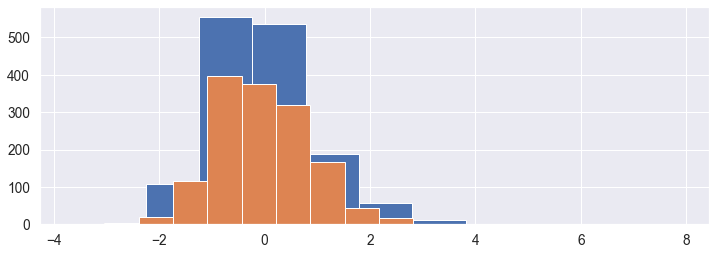

In [12]:
# com isso, eh possivel ver um grafico de histograma um pouco mais estreito, numa escala diferente (-4 a 8 desvios padrões)
fig, ax = plt.subplots(figsize = (12,4))
ax.hist(x_std[:,0]) # em azul
ax.hist(x_std[:,1]) # em laranja
plt.show()

In [13]:
# dessa vez, partindo para o tratamento por normalização da variável X (lembrando que os valores estarão entre 0 e 1)
x_norm = MinMaxScaler().fit_transform(x)
x_norm

array([[0.25923135, 0.66666667],
       [0.17483044, 0.55555556],
       [0.27354936, 0.66666667],
       ...,
       [0.37792012, 0.66666667],
       [0.14016579, 0.44444444],
       [0.17370008, 0.44444444]])

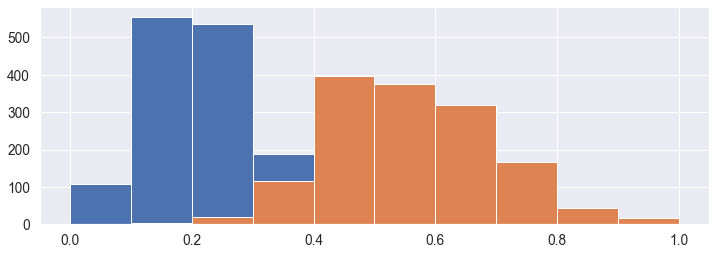

In [14]:
# lembrando que a escala é de 0 a 1 agora.
# Aproveitando pra destacar que a figura não vai mudar. Olhando os três histogramas do x[0], temos a mesma figura,
# só que os valores se adequaram em uma escala que é possível comparar com outros, desde que estejam nessa escala também.
fig, ax = plt.subplots(figsize = (12,4))
ax.hist(x_norm[:,0])
ax.hist(x_norm[:,1])
plt.show()

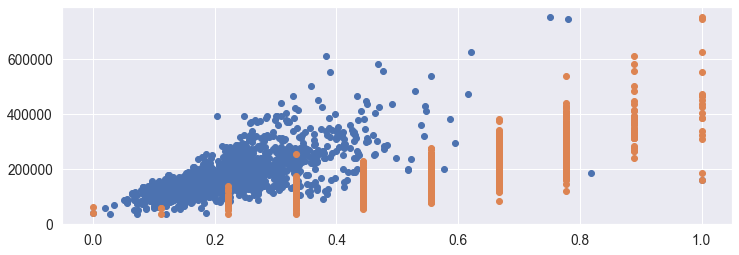

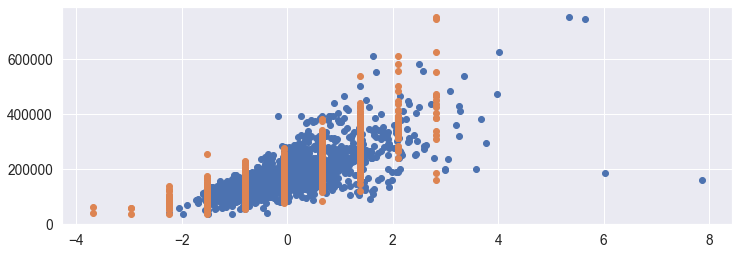

In [15]:
# Olhando por "scatter", temos a mesma figura de antes do tratamento. Só que agora conseguimos comparar x[0] e x[1] no
# mesmo gráfico
fig, ax = plt.subplots(figsize = (12,4))
ax.scatter(x_norm[:,0],y)
ax.scatter(x_norm[:,1],y)

fig, ax = plt.subplots(figsize = (12,4))
ax.scatter(x_std[:,0],y)
ax.scatter(x_std[:,1],y)

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

In [61]:
# Dividindo aquele conjunto ("x[0,1]" e "y") em variáveis de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(x,y)

In [51]:
# Definindo o pipeline pro dimensionamento e ajuste do modelo (é a criação do modelo)
pipeline = Pipeline([
    ("MinMax Scalling", MinMaxScaler()),    #foi escolhida a normalização, como forma de tratar os dados
    ("SGD Regression", SGDRegressor())      #essa é a regressão da descida do gradiente (baseada em distâncias Euclidianas)
])

In [52]:
# Dimensionando os dados e ajustes do modelo (é o ajuste do modelo)
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('MinMax Scalling', MinMaxScaler()),
                ('SGD Regression', SGDRegressor())])

In [53]:
# Avaliando o modelo
Y_pred = pipeline.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(Y_pred,Y_test))
print("Score", pipeline.score(X_test, Y_test))

Mean Absolute Error:  29036.523473715064
Score 0.7421836895706448


In [31]:
# Criando agora um pipeline de modelo diferente, utilizando a mesma descida do gradiente, mas sem nenhuma forma
# de feature scalling (sem normalizar/padronizar)
# É possível perceber que o score é absurdamente pequeno (e negativo) e um erro médio absoluto com 11 casas aproximadamente. Ou seja,
# o erro está na faixa de bilhões. Com a normalização, foi possível alcançar um score de ~75%, ou seja, consigo explicar 75%
# dos valores da variável dependente.
pipeline_2 = Pipeline([
    ("SGD Regression", SGDRegressor())
])
pipeline_2.fit(X_train,Y_train)
Y_pred_2 = pipeline_2.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(Y_pred_2,Y_test))
print("Score", pipeline_2.score(X_test, Y_test))

Mean Absolute Error:  590977030236955.8
Score -6.04239954031433e+19


In [63]:
#Testando outros tipos de pipeline
#Um com feature scalling e outro sem, ambos por meio de regeressão linear, que é baseado no Método
#dos Mínimos Quadrados

pipeline_3 = Pipeline([
    ("Scaling", StandardScaler()),
    ("Linear Regression", LinearRegression())
])
pipeline_3.fit(X_train,Y_train)
Y_pred_3 = pipeline_3.predict(X_test)

print("Pipeline_3 -> Mean Absolute Error: ", mean_absolute_error(Y_pred_3,Y_test))
print("Pipeline_3 -> Score", pipeline_3.score(X_test, Y_test))

Pipeline_3 -> Mean Absolute Error:  29519.810597756627
Pipeline_3 -> Score 0.6030161136237677


In [65]:
#Ao rodar essa quarta pipeline, percebe-se que o feature scalling não influencia a regressão linear. O score e o erro são
#idênticos. Portanto, usar feature scalling dependerá do problema e do algoritmo que se está trabalhando.
pipeline_4 = Pipeline([
    ("Linear Regression", LinearRegression())
])
pipeline_4.fit(X_train,Y_train)
Y_pred_4 = pipeline_4.predict(X_test)

print("Pipeline_4 -> Mean Absolute Error: ", mean_absolute_error(Y_pred_4,Y_test))
print("Pipeline_4 -> Score", pipeline_4.score(X_test, Y_test))

Pipeline_4 -> Mean Absolute Error:  29519.810597756637
Pipeline_4 -> Score 0.6030161136237675
